<a href="https://colab.research.google.com/github/ashrafulwork/Learning_MLDL/blob/Project_ML_DL_/project_loan_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet Information:

Loan_ID :Provides the id number given to the candidature .
Gender :The gender of a candidature.
Married :The candidature marital Status.
Dependants : The number of people dependent on the candidate.
Education :The education of a candidate.
Self_employed :The employment type of a candidate.
ApplicantIncome :Total income of a candidate.
CoapplicantIncome:Total income of a coapplicant of a candidate.
LoanAmount :Total amount of a loan.
Loan_Amount_Term :The total time duration of a loan.
Credit_History :The credit score of a candidate.
Property_Area : From which region the candidate belongs.
Loan_Status :Whether the loan is approved or not.

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import numpy as np
import seaborn as sns
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

     | 17.8 MB 21.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=9353deaac23427a44f7b7d12842e255ed45b0cabaa2270736b296dafbf053f70
  Stored in directory: /tmp/pip-ephem-wheel-cache-kw9dya1l/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=91c6fcf7a0bbbfbf9c777f38b7b06aca49e94f9697eee2bddae9de8e2025197d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succes

<ipython-input-1-cdf89260631c>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
loan_dataset = pd.read_csv('/content/loan_train.csv')

In [3]:
profile = ProfileReport(loan_dataset, title="Loan Dataset")

In [4]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
loan_dataset['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

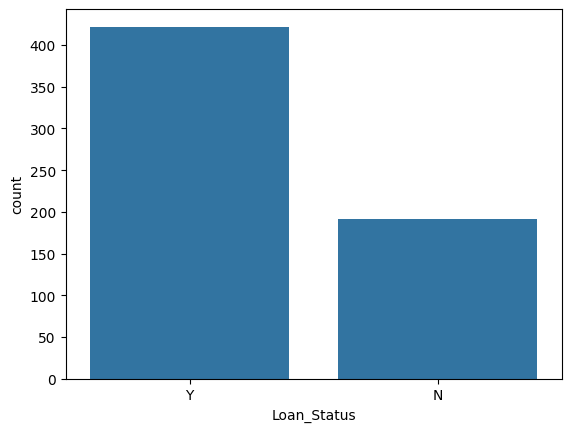

In [7]:
import seaborn as sns

# Check the class distribution
print(loan_dataset['Loan_Status'].value_counts())

# Plot the class distribution
sns.countplot(x='Loan_Status', data=loan_dataset)

In [8]:
# from imblearn.over_sampling import SMOTE

# # Separate input features (X) and target variable (y)
# X = loan_dataset.drop('Loan_Status', axis=1)
# y = loan_dataset['Loan_Status']

# # Convert categorical columns to numeric using dummy encoding (if necessary)
# X = pd.get_dummies(X)

# # Apply SMOTE to the dataset
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# # Check the new class distribution
# print(y_res.value_counts())

In [9]:
loan_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [10]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [11]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [12]:
loan_dataset.isnull().any()

,0
Loan_ID,False
Gender,True
Married,True
Dependents,True
Education,False
Self_Employed,True
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,True
Loan_Amount_Term,True


In [13]:
# loan_dataset=loan_dataset.drop_duplicates()
#no duplicates found

In [14]:
(loan_dataset == '?').sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [15]:
# def plot_boxplot(df, ft):
#     df.boxplot(column =[ft])
#     plt.grid(False)
#     plt.show()


In [16]:
# plot_boxplot(loan_dataset,'ApplicantIncome')

In [17]:
# def outliers(df, ft):
#     Q1 = df[ft].quantile(0.25)
#     Q3 = df[ft].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Print the lower and upper bounds
#     print(f"Lower Bound: {lower_bound}")
#     print(f"Upper Bound: {upper_bound}")

#     ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
#     return ls




In [18]:
# index_list = []
# for feature in ['ApplicantIncome', 'CoapplicantIncome']:
#     index_list.extend(outliers(loan_dataset, feature))

In [19]:
# index_list

In [20]:
# def remove(df,ls):
#     ls = sorted(set(ls))
#     df = df.drop(ls)
#     return df

In [21]:
# df_cleaned  = remove(loan_dataset, index_list)

In [22]:
# plot_boxplot(df_cleaned,'ApplicantIncome')


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

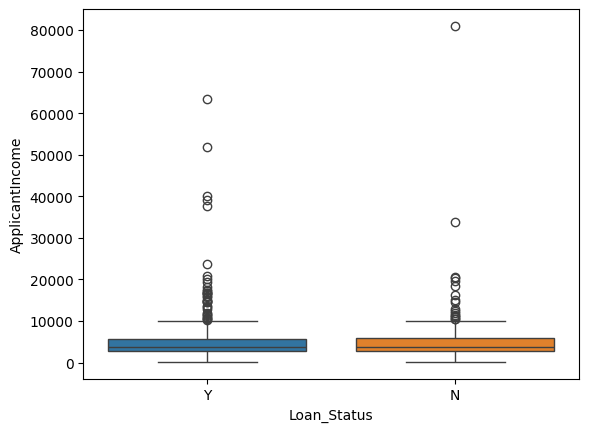

In [32]:
sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

<Axes: ylabel='ApplicantIncome'>

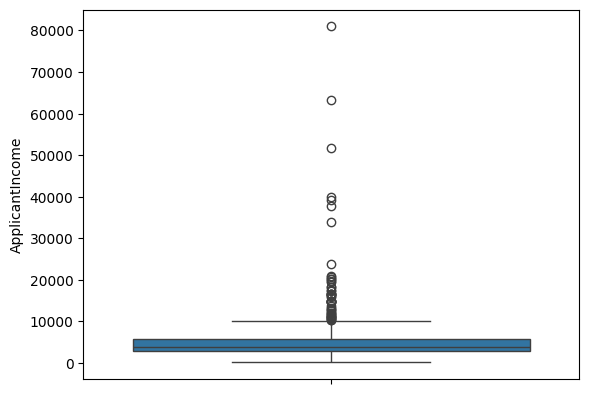

In [26]:
sns.boxplot(y=loan_dataset['ApplicantIncome'], orient='v')

In [33]:
len(loan_dataset['ApplicantIncome'])

614

In [34]:
q1 = loan_dataset['ApplicantIncome'].quantile(0.25)
q3 = loan_dataset['ApplicantIncome'].quantile(0.75)
iqr = q3-q1

In [35]:
q1,q3,iqr

(2877.5, 5795.0, 2917.5)

In [36]:
up  = q3 + (1.5 *iqr)
lp = q1 - (1.5 *iqr)
lp, up

(-1498.75, 10171.25)

In [37]:
new_df = loan_dataset.loc[(loan_dataset['ApplicantIncome'] < up) & (loan_dataset['ApplicantIncome'] > lp)]
print("before removing outliers : ", len(loan_dataset))
print("after removing outliers : ", len(new_df))
print("outlier numbers : ", len(loan_dataset)-len(new_df))

before removing outliers :  614
after removing outliers :  564
outlier numbers :  50


<Axes: xlabel='ApplicantIncome'>

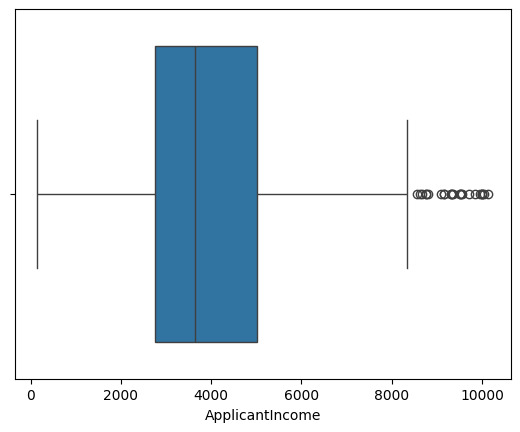

In [38]:
sns.boxplot(x=new_df['ApplicantIncome'], orient='h')

In [39]:
new_df = loan_dataset.copy()
new_df.loc[(new_df['ApplicantIncome'] > up), 'ApplicantIncome'] = up
new_df.loc[(new_df['ApplicantIncome'] < lp), 'ApplicantIncome'] = lp

<ipython-input-39-5cf9b750cc90>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10171.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[(new_df['ApplicantIncome'] > up), 'ApplicantIncome'] = up


<Axes: xlabel='ApplicantIncome'>

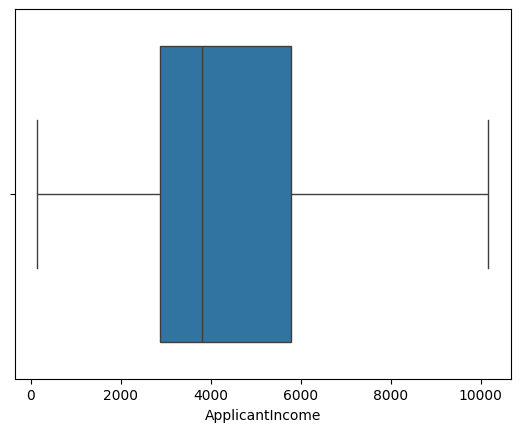

In [46]:
sns.boxplot(x=new_df['ApplicantIncome'], orient='h')

In [43]:
print(len(new_df))

614


In [48]:
loan_dataset = new_df

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

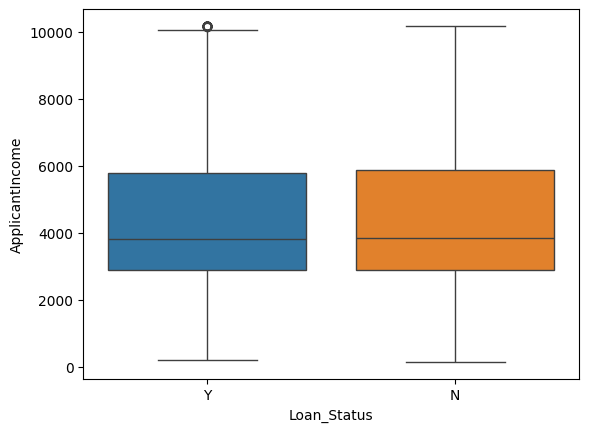

In [49]:
sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

In [ ]:
X = loan_dataset.drop(columns=['Loan_Status'])  # Drop Loan_ID and target column
Y = loan_dataset['Loan_Status']

In [ ]:
loan_dataset['Loan_ID'] = loan_dataset['Loan_ID'].str.replace('LP', '11')
X = loan_dataset

In [ ]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].str.replace('3+', '3')
X = loan_dataset

In [ ]:
print(loan_dataset['Dependents'].value_counts())

Dependents
0    247
2     71
1     61
3     27
Name: count, dtype: int64


In [ ]:
print(X)
print(Y)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    11001003    Male     Yes          1      Graduate            No   
2    11001005    Male     Yes          0      Graduate           Yes   
3    11001006    Male     Yes          0  Not Graduate            No   
4    11001008    Male      No          0      Graduate            No   
6    11001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
607  11002964    Male     Yes          2  Not Graduate            No   
608  11002974    Male     Yes          0      Graduate            No   
609  11002978  Female      No          0      Graduate            No   
612  11002984    Male     Yes          2      Graduate            No   
613  11002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

In [ ]:
label_enc = LabelEncoder()
for col in loan_dataset.columns:
    loan_dataset[col] = label_enc.fit_transform(loan_dataset[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 10)

In [ ]:
print(X_train)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
238  LP001790  Female      No          1      Graduate            No   
570  LP002842    Male     Yes          1      Graduate            No   
560  LP002807    Male     Yes          2  Not Graduate            No   
352  LP002141    Male     Yes         3+      Graduate            No   
361  LP002170    Male     Yes          2      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
11   LP001027    Male     Yes          2      Graduate           NaN   
608  LP002974    Male     Yes          0      Graduate            No   
356  LP002149    Male     Yes          2      Graduate            No   
454  LP002453    Male      No          0      Graduate           Yes   
218  LP001732    Male     Yes          2      Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
238             3812                0.0       112.0           

In [ ]:

loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,247
2,71
1,61
3,27
4,9


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train =X_train_std

ValueError: could not convert string to float: '3+'

In [ ]:
X_test_stand = sc.transform(X_test)
X_test = X_test_stand

In [ ]:
print(X_train)
print(X_test)

[[ 0.40496156  0.70561368 -0.73771063 ... -0.5310295   0.15305309
   1.2305204 ]
 [ 2.77205829  0.70561368  1.92564172 ... -0.5310295   0.15305309
   1.2305204 ]
 [ 0.40496156 -1.34442369 -0.73771063 ... -0.5310295   0.15305309
  -0.04144911]
 ...
 [ 0.40496156  0.70561368  1.92564172 ... -0.5310295   0.15305309
  -0.04144911]
 [-1.96213517 -1.34442369 -0.73771063 ... -0.0034729   0.15305309
  -1.31341861]
 [ 0.40496156  0.70561368  0.15007349 ...  0.03990961  0.15305309
   1.2305204 ]]
[[ 2.77205829 -1.34442369 -0.73771063 ... -0.5310295   0.15305309
   1.2305204 ]
 [-1.96213517 -1.34442369 -0.73771063 ... -0.5310295   0.15305309
  -0.04144911]
 [ 0.40496156 -1.34442369 -0.73771063 ... -0.5310295   0.15305309
   1.2305204 ]
 ...
 [ 0.40496156  0.70561368 -0.73771063 ...  1.13650536  0.15305309
  -1.31341861]
 [ 0.40496156  0.70561368  1.0378576  ... -0.13362041 -1.99406317
  -1.31341861]
 [ 0.40496156  0.70561368 -0.73771063 ...  0.42940218  2.30016935
   1.2305204 ]]


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_pred = model.predict(X_train)
tr_data_acc = accuracy_score(X_pred, Y_train)
print(tr_data_acc)

0.8126272912423625


In [ ]:
X_test_pred = model.predict(X_test)
ts_data_acc = accuracy_score(X_test_pred, Y_test)
print(ts_data_acc)

0.8130081300813008


In [ ]:
print(X_train)

[[ 0.40496156  0.70561368 -0.73771063 ... -0.5310295   0.15305309
   1.2305204 ]
 [ 2.77205829  0.70561368  1.92564172 ... -0.5310295   0.15305309
   1.2305204 ]
 [ 0.40496156 -1.34442369 -0.73771063 ... -0.5310295   0.15305309
  -0.04144911]
 ...
 [ 0.40496156  0.70561368  1.92564172 ... -0.5310295   0.15305309
  -0.04144911]
 [-1.96213517 -1.34442369 -0.73771063 ... -0.0034729   0.15305309
  -1.31341861]
 [ 0.40496156  0.70561368  0.15007349 ...  0.03990961  0.15305309
   1.2305204 ]]


In [ ]:
loan_dataset.to_csv('modified_dataset44.csv', index=False)


In [ ]:
input_data = (1,0,0,0,0,5849,0.0,1,2)

input_data_np = np.asarray(input_data, dtype=object)  # Ensure that the  ID is treated as an object
input_data_reshaped = input_data_np.reshape(1, -1)
in_np = np.asarray(input_data)
input_data_reshaped = in_np.reshape(1, -1)

std_data = sc.transform(input_data_reshaped)
print(std_data)
prediction = model.predict(std_data)
print(prediction)

if prediction[0] == 1:
    print('Y')
else:
    print('N')




[[ 0.40496156 -1.34442369 -0.73771063 -0.50889523 -0.44421543  0.11293923
  -0.5310295   0.15305309  1.2305204 ]]
[1]
Y


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.42      0.94      0.58        17
           1       0.99      0.79      0.88       106

    accuracy                           0.81       123
   macro avg       0.70      0.87      0.73       123
weighted avg       0.91      0.81      0.84       123



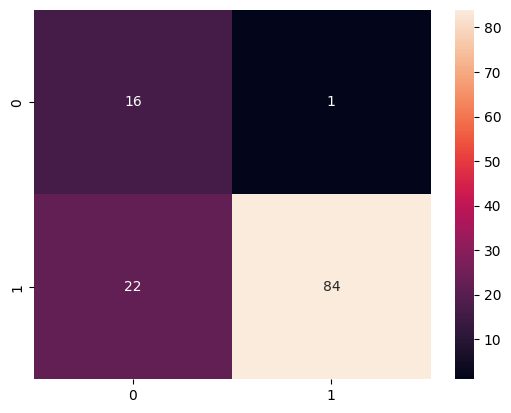

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report


corr  = confusion_matrix(X_test_pred,Y_test)
sns.heatmap(corr,annot =True)
print(classification_report(X_test_pred,Y_test))

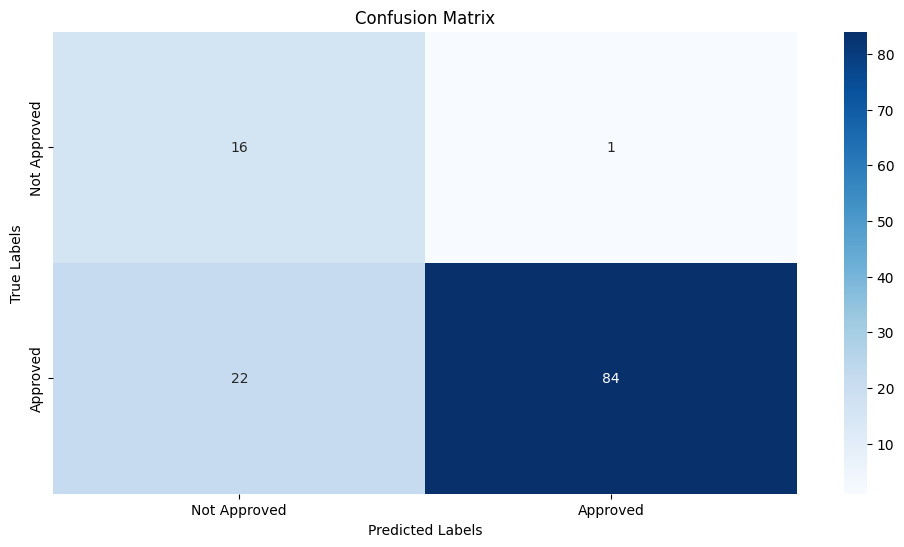

In [ ]:


# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

